# Matplot 可视化

refer to :https://matplotlib.org/gallery/index.html

## 可视化图的基本结构

Data: 数据
Axis: 坐标轴
Title: 
Legeng：

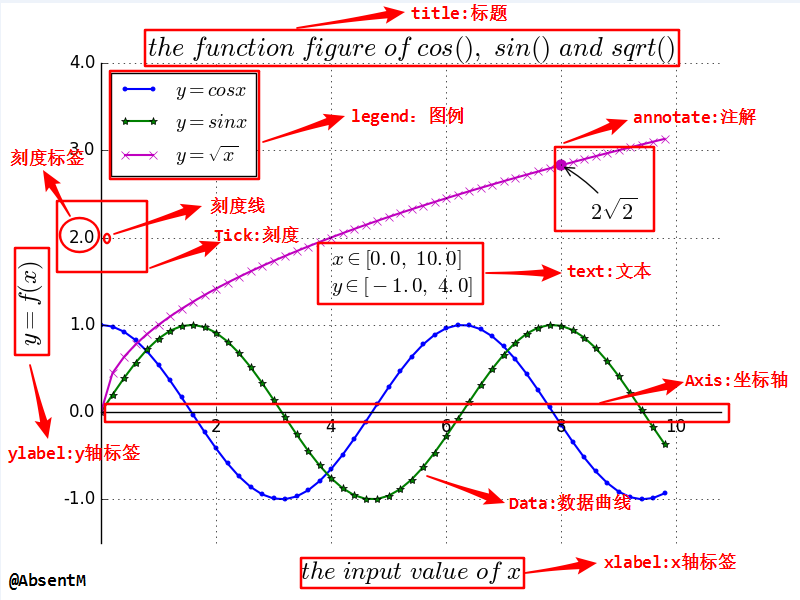

## 用法

1. 导入matplotlib
2. 准备数据，numpy数组存储
3. 绘制原始曲线
4. 标题、坐标轴、刻度
5. 文字说明
6. 显示，同时也可以保存结果

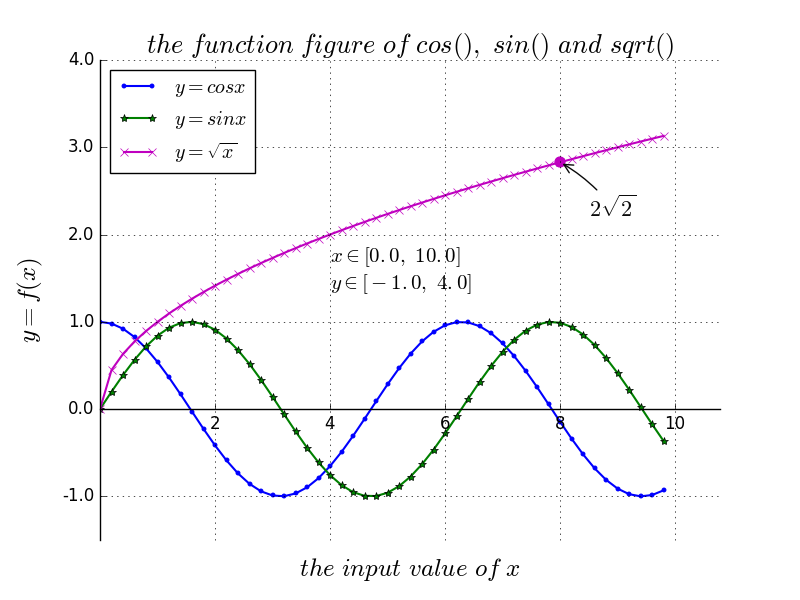

### 导包
matplotlib  pylab numpy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
plt.rcParams['font.sans-serif']=['SimHei'] #图表中显示中文文字
plt.rcParams['axes.unicode_minus']=False #图表显示正负号

### 准备数据

In [3]:
#numpy 用来组织数据源
#定义数据
x = np.arange(0., 10., 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

###  绘制基本曲线
使用plot函数直接绘制上述曲线，通过配置参数调整曲线的式样、粗细、颜色、标记

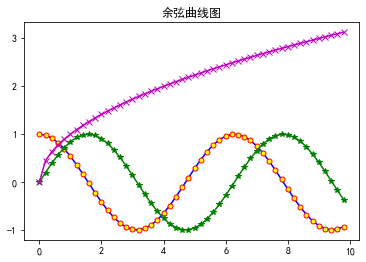

In [4]:
#绘制3条函数曲线
plt.plot(x,
         y1,
         color='blue',
         linewidth = 1.5, 
         linestyle = '-', 
         marker = '.', markersize=10, markeredgecolor='red',markerfacecolor='yellow',
         label=r'$y = cos{x}$')
plt.title('余弦曲线图')
plt.plot(x, y2,color='green',linewidth = 1.5, linestyle = '-', marker = '*', label=r'$y = sin{x}$')
plt.plot(x, y3,color='m',linewidth = 1.5, linestyle = '-', marker = 'x', label=r'$y = \sqrt{x}$')
plt.show()

####  颜色
color参数 ：r  g  b 

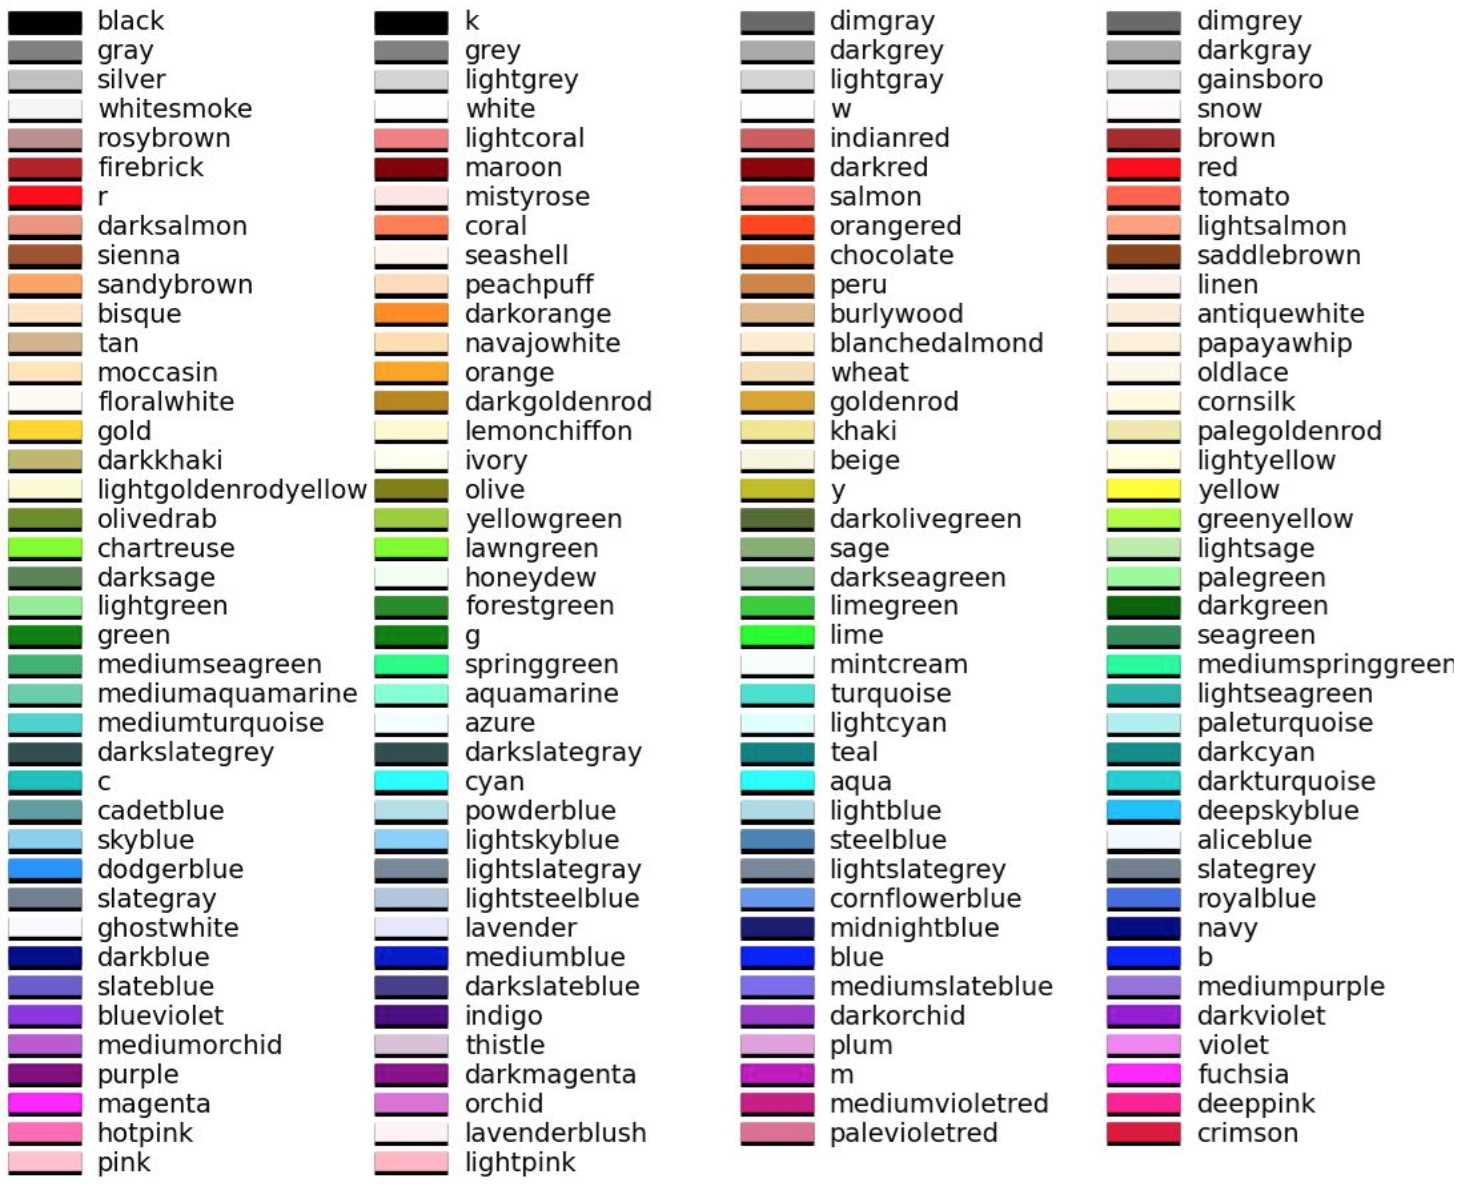

#### linestyle参数

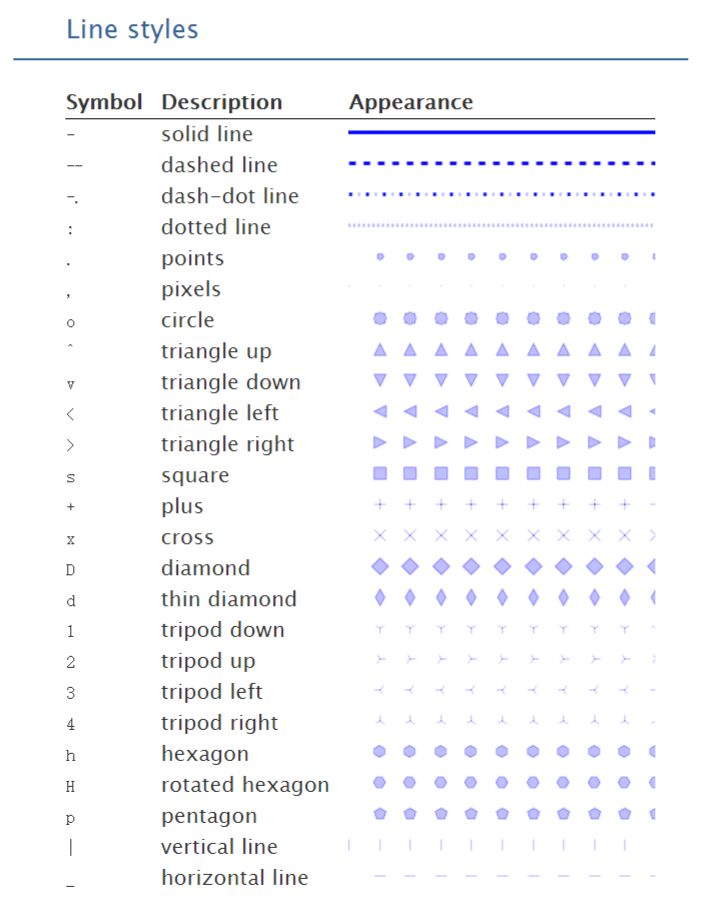

#### marker参数

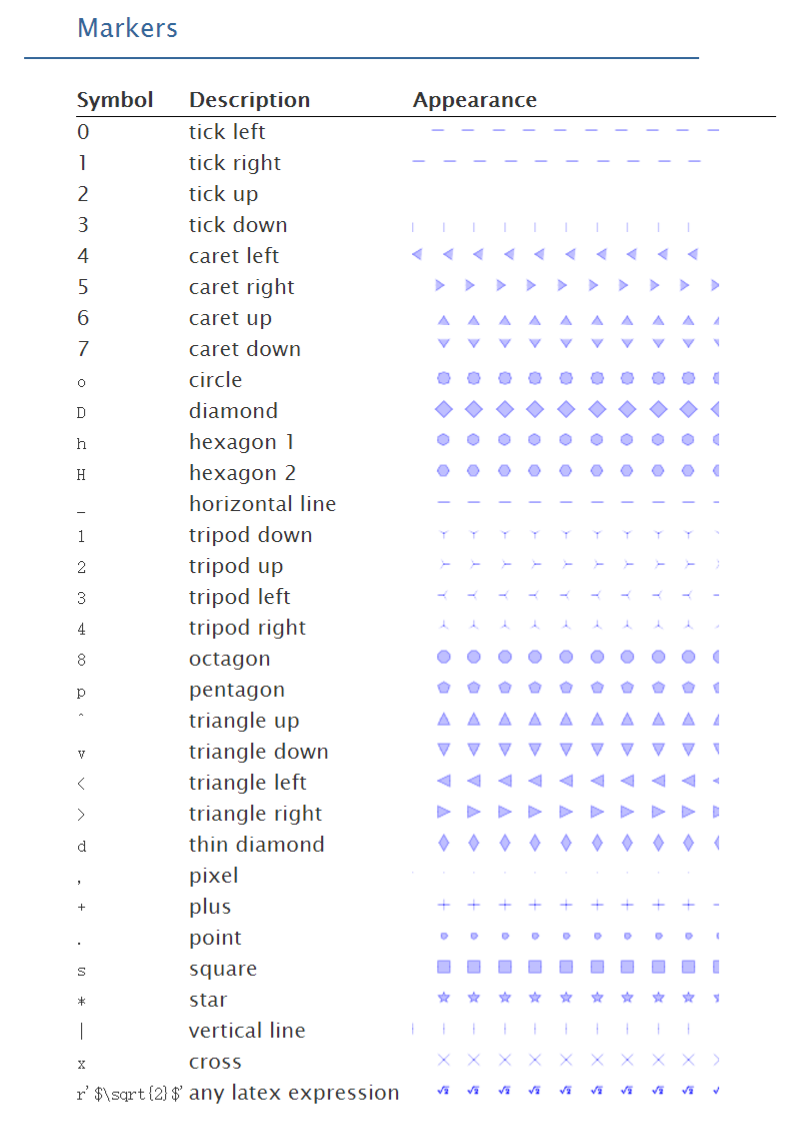

### 设置坐标轴

#### 调整刻度轴为日期格式

In [5]:
air_data=pd.read_csv('air_data.csv')
air_data['FFP_DATE']=pd.to_datetime(air_data['FFP_DATE'],
                                   format='%Y.%m.%d',
                                    errors='coerce')
group_data=air_data.groupby(air_data['FFP_DATE']).size()

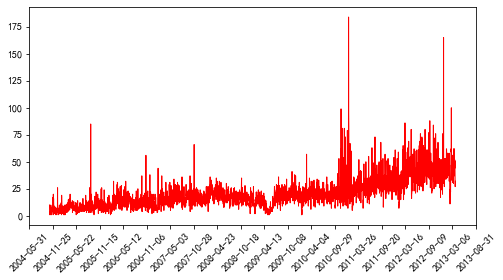

In [6]:
import matplotlib as mpl
#获取图的坐标信息
ax = plt.gca()
fig = plt.gcf()#返回图像并命名为fig
fig.set_size_inches(8,4)
#设置日期显示格式
date_format=mpl.dates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
# 设置x轴显示多少个日期刻度
xlocator=mpl.ticker.LinearLocator(20)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45,
          fontsize=10)
plt.plot(group_data.index,group_data.values,
        ls='-',lw=1,color='red')
plt.show()

#### 移动坐标轴

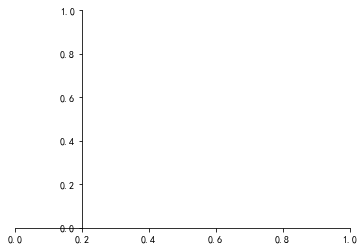

In [31]:
#坐标轴上移动
ax = plt.subplot(111)
ax.spines['right'].set_color('none')#去掉右边的边框线
ax.spines['top'].set_color('none')#去掉上边的边框线
ax.xaxis.set_ticks_position('bottom')#移动x轴-上下
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')#移动y轴-左右
ax.spines['left'].set_position(('data', 0.2))

#### 轴刻度取值范围

(-1.5, 4.0)

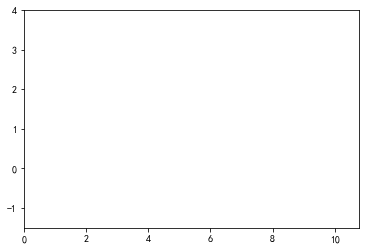

In [32]:
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)

#### 轴刻度设置

([<matplotlib.axis.YTick at 0x1958750ca58>,
 [Text(0, -1.0, '-1.0'),
  Text(0, 0.0, '0.0'),
  Text(0, 1.0, '1.0'),
  Text(0, 2.0, '2.0'),
  Text(0, 3.0, '3.0'),
  Text(0, 4.0, '4.0')])

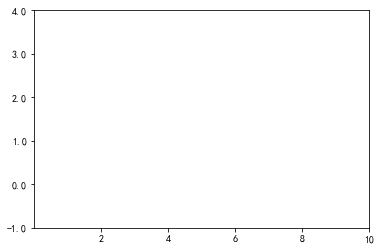

In [33]:
plt.xticks([2,4,6,8,10], [r'2', r'4', r'6', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], [r'-1.0', r'0.0',r'1.0', r'2.0', r'3.0', r'4.0'])

Text(0, 0.5, '$y = f(x)$')

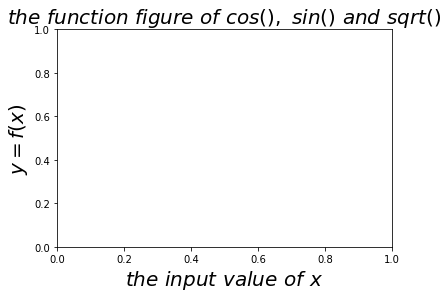

In [24]:
#设置标题
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize = 20)
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=20)
plt.ylabel(r'$y = f(x)$', fontsize = 20)

### 设置文字描述

#### 添加文本信息

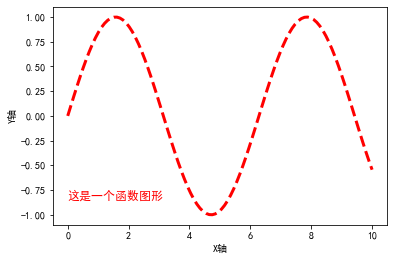

In [17]:
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y,c='red',lw=3,ls='--')
plt.text(0,-0.85,
         '这是一个函数图形',
        color='red',
        fontsize=12,
        )
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.show()

#### 对特殊点加注释

Text(8.5, 2.9, '$2\\sqrt{2}$')

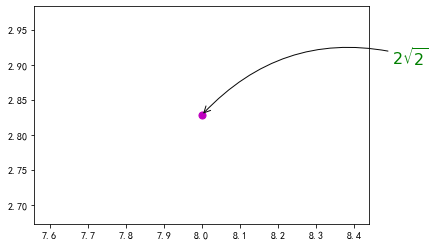

In [59]:
plt.scatter([8,], [np.sqrt(8),], 50, color= 'm')
plt.annotate(r'$2\sqrt{2}$', 
             xy = (8, sqrt(8)),
             xytext = (8.5, 2.9),
             fontsize = 16, 
             color = 'green', 
             arrowprops = dict(arrowstyle = '->', 
                               connectionstyle = 'arc3 ,rad = 0.3', 
                               color = '#090909'))

###  画布及图例设置

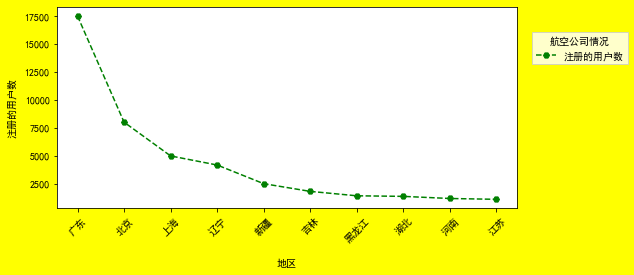

In [66]:
# 1.画布和图例的使用
air_data=pd.read_csv('air_data.csv')
#air_data.head(5)
WORK_PROVINCE=air_data['WORK_PROVINCE'].value_counts()[:10]
fig =plt.figure(figsize=(8,4),facecolor='yellow')#创建画布
ax = fig.add_axes([0.2,0.2,0.8,0.7])#画布大小
plt.plot(WORK_PROVINCE.index,
         WORK_PROVINCE.values,
         color='g',marker='H',
        ls='--',label='注册的用户数')
plt.xlabel('地区',labelpad=15)
plt.ylabel('注册的用户数',labelpad=8)
plt.xticks(WORK_PROVINCE.index,rotation=45,
          fontsize=10)
# 图例设置
plt.legend(bbox_to_anchor=(1.25,0.9),# 设置图例显示位置
          ncol=1,frameon=True,title='航空公司情况',
          shadow=False,fancybox=False)
plt.show()

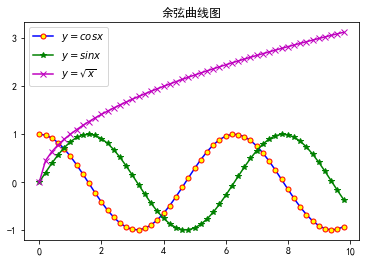

In [27]:
x = np.arange(0., 10., 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)
#绘制3条函数曲线
plt.rcParams['font.sans-serif']=['SimHei'] #图表中显示中文文字
plt.rcParams['axes.unicode_minus']=False #图表显示正负号
plt.plot(x,
         y1,
         color='blue',
         linewidth = 1.5, 
         linestyle = '-', 
         marker = '.', markersize=10, markeredgecolor='red',markerfacecolor='yellow',
         label=r'$y = cos{x}$')
plt.title('余弦曲线图')
plt.plot(x, y2,color='green',linewidth = 1.5, linestyle = '-', marker = '*', label=r'$y = sin{x}$')
plt.plot(x, y3,color='m',linewidth = 1.5, linestyle = '-', marker = 'x', label=r'$y = \sqrt{x}$')
plt.legend(loc='best')
#plt.legend(loc = 'upper right')
plt.show()

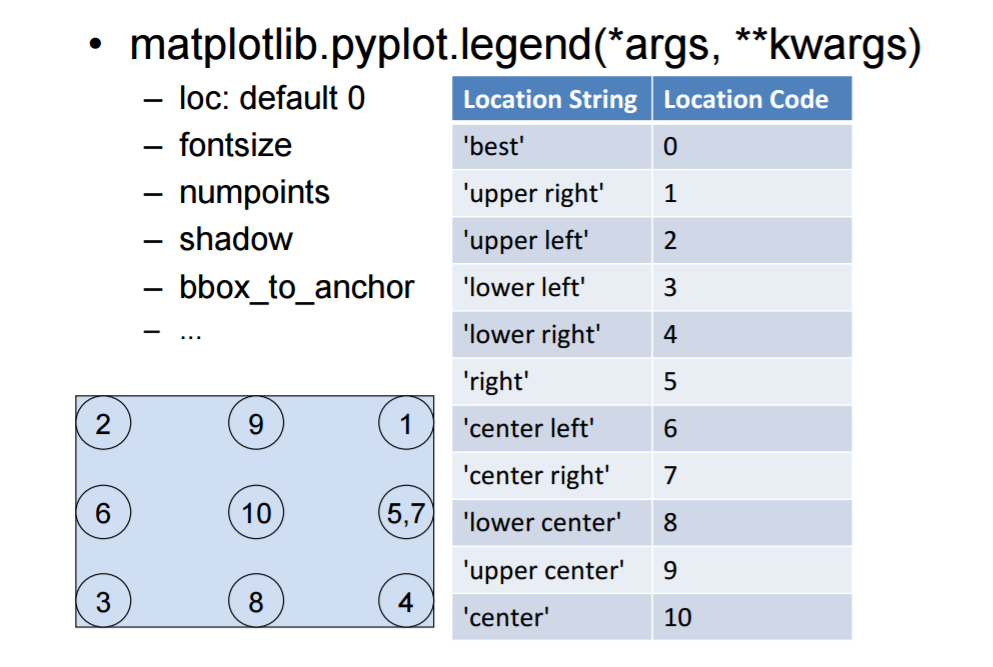

### 网格线开关

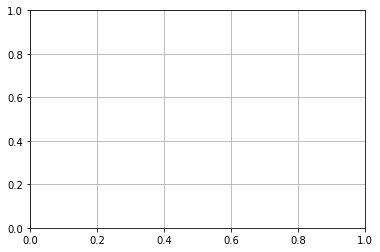

In [34]:
#显示网格线
plt.grid(True)

### 绘制参考线

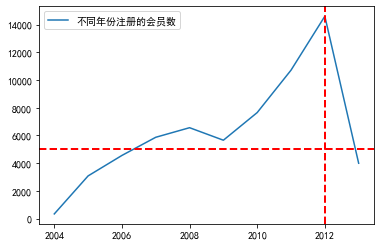

In [40]:
import pandas as pd
df = pd.read_csv('air_data.csv')
df['FFP_DATE']=pd.to_datetime(df['FFP_DATE'],
                              format='%Y/%m/%d',
                              errors='coerce')
df['FFP_DATE'].dt.year #只获取年份
group_data = df.groupby(df['FFP_DATE'].dt.year).size() #按年份统计样本
plt.plot(group_data.index,group_data.values,
        label='不同年份注册的会员数')
plt.legend(loc='best')
# 参考线绘制:水平与垂直
plt.axhline(y=5000,c='red',ls='--',lw=2)
plt.axvline(x=2012,c='red',ls='--',lw=2)
plt.show()

### 绘制参考区域

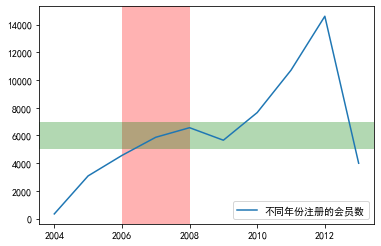

In [43]:
plt.plot(group_data.index,group_data.values,
        label='不同年份注册的会员数')
plt.legend(loc='best')
# 绘制参考区域
plt.axvspan(xmin=2006,xmax=2008,
            facecolor='red',
           alpha=0.3)
plt.axhspan(ymin=5000,ymax=7000,
           facecolor='green',
           alpha=0.3)
plt.show()

### 绘制子图

#### subplot

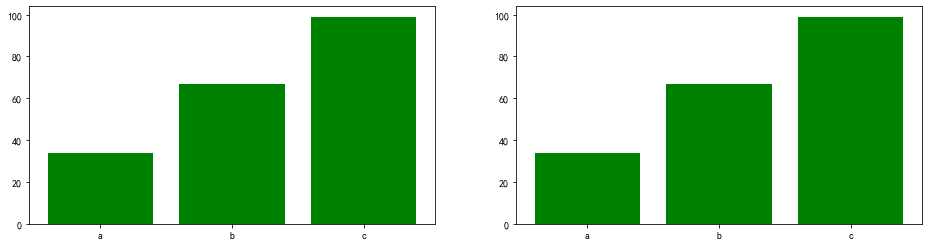

In [65]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(x=['a','b','c'],
       height=[34,67,99],
       align='center',
       color='g',
       )
plt.subplot(122)
plt.bar(x=['a','b','c'],
       height=[34,67,99],
       align='center',
       color='g',
       )
plt.show()

#### subplot2grid

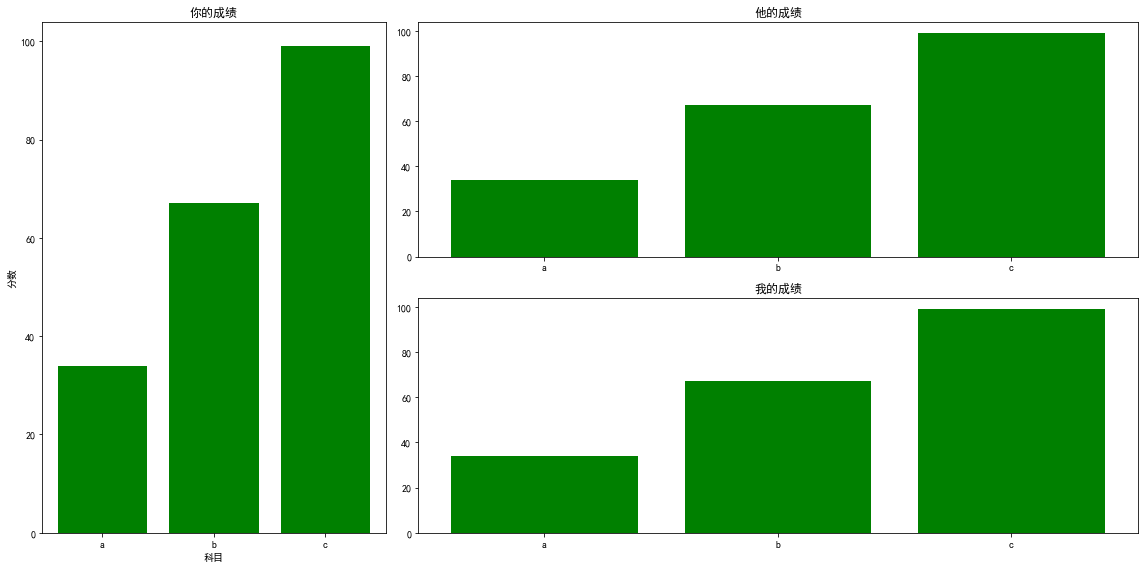

In [15]:
plt.figure(figsize=(16,8))
# (2,3):2行3列 | col+row:选1列2行为一个子图空间。
plt.subplot2grid((2,3),(0,0),
                 colspan=1,rowspan=2)
plt.bar(x=['a','b','c'],
       height=[34,67,99],
       align='center',
       color='g',
       )
plt.xlabel('科目')
plt.ylabel('分数')
plt.title('你的成绩')

plt.subplot2grid((2,3),(0,1),
                 colspan=2,rowspan=1)
plt.bar(x=['a','b','c'],
       height=[34,67,99],
       align='center',
       color='g',
       )
plt.title('他的成绩')

plt.subplot2grid((2,3),(1,1),
                 colspan=2,rowspan=1)
plt.bar(x=['a','b','c'],
       height=[34,67,99],
       align='center',
       color='g',
       )
plt.title('我的成绩')
plt.tight_layout()#自动调节子图间的距离
plt.show()

### 保存图形

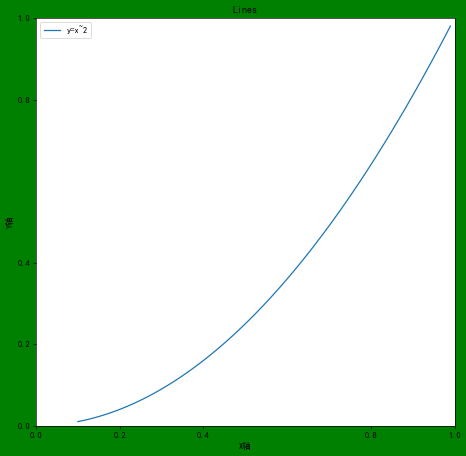

In [46]:
x=np.arange(0.1,1,0.01)
y=x**2
plt.figure(figsize=(9,9),dpi=60,
          facecolor='green')
plt.title('Lines')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks([0,0.2,0.4,0.8,1.0])
plt.yticks([0,0.2,0.4,0.8,1.0])
plt.plot(x,y,label='y=x~2')
plt.legend(loc=0)
plt.savefig("可视化")
plt.show()

## 完整示例项目

C:\Users\neustu\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


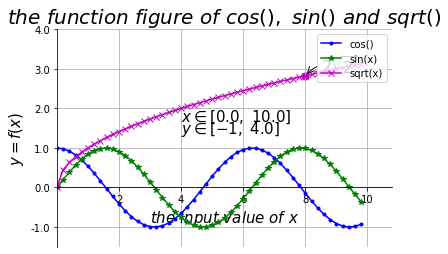

In [38]:
#完整的绘制程序
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#numpy 用来组织数据源
#定义数据
x = np.arange(0., 10., 0.2)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.sqrt(x)

#绘制3条函数曲线
plt.plot(x, y1,color='blue',linewidth = 1.5, linestyle = '-', marker = '.', label=r'$y = cos{x}$')
plt.plot(x, y2,color='green',linewidth = 1.5, linestyle = '-', marker = '*', label=r'$y = sin{x}$')
plt.plot(x, y3,color='m',linewidth = 1.5, linestyle = '-', marker = 'x', label=r'$y = \sqrt{x}$')

#坐标轴上移动
ax = plt.subplot(111)
ax.spines['right'].set_color('none')#去掉右边的边框线
ax.spines['top'].set_color('none')#去掉上边的边框线
ax.xaxis.set_ticks_position('bottom')#移动x轴-上下
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')#移动y轴-左右
ax.spines['left'].set_position(('data', 0))

#设置x y轴的刻度取值范围
plt.xlim(x.min()*1.1, x.max()*1.1)
plt.ylim(-1.5, 4.0)
#设置x和y轴的刻度
plt.xticks([2,4,6,8,10], [r'2', r'4', r'6', r'8', r'10'])
plt.yticks([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], [r'-1.0', r'0.0',r'1.0', r'2.0', r'3.0', r'4.0'])

#添加文字
plt.text(4, 1.68, r'$x \in  [0.0, \ 10.0]$', color = 'k', fontsize = 15)
plt.text(4, 1.38, r'$y \in  [-1, \ 4.0]$', color = 'k', fontsize = 15)

#对特殊点加注释
plt.scatter([8,], [np.sqrt(8),], 50, color= 'm')
plt.annotate(r'$2\sqrt{2}$', xy = (8, sqrt(8)),xytext = (8.5, 2.9), fontsize = 16, color = '#090909', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3 ,rad = 0.3', color = '#090909'))

#设置标题
plt.title(r'$the \ function \ figure \ of \ cos(), \ sin() \ and \ sqrt()$', fontsize = 20)
plt.xlabel(r'$the \ input \ value \ of \ x$', fontsize=15)
plt.ylabel(r'$y = f(x)$', fontsize = 15)

plt.legend(['cos()', 'sin(x)', 'sqrt(x)'], loc = 'upper right')

#显示网格线
plt.grid(True)

#显示和保存
plt.show()

## 常用图形
- 曲线图：plot()
- 灰度图：hist()
- 散点图：scatter()
- 箱式图：boxplt()

### 曲线图

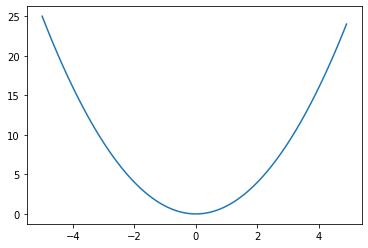

In [39]:
x = np.arange(-5, 5, 0.1)
y = x **2
plt.plot(x,y)

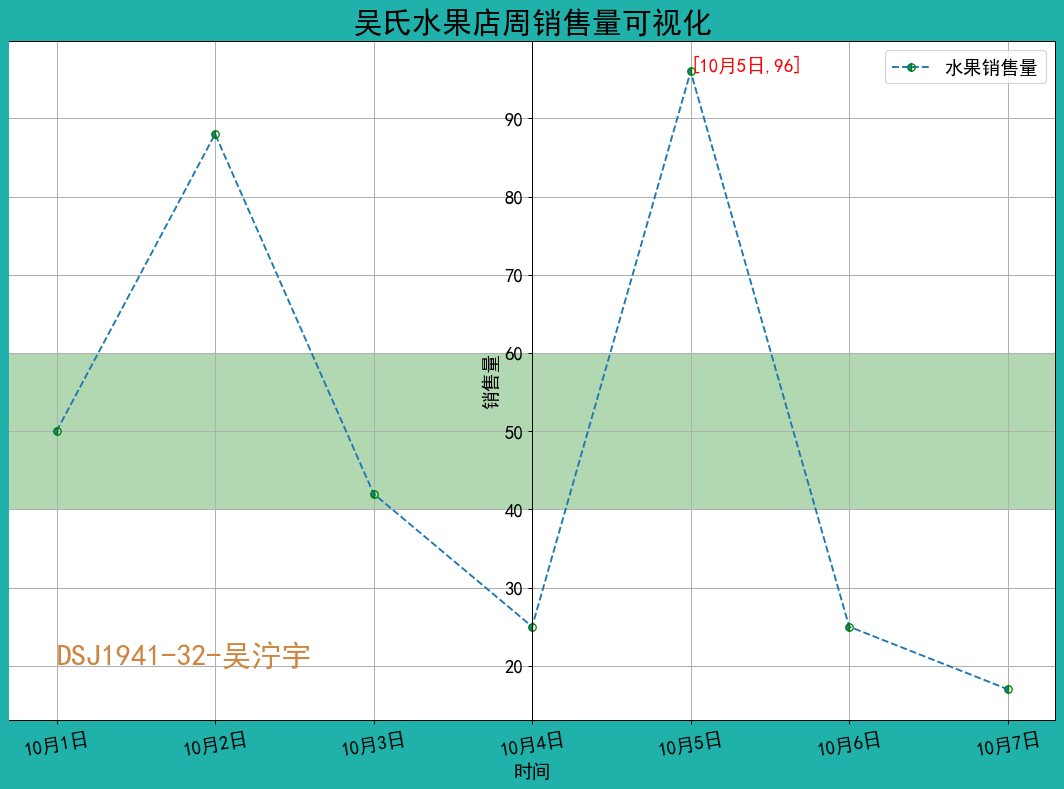

In [94]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False
# 数据及参数准备
x_data = ["10月{}日".format(i+1) for i in range(7)]
y_view = [random.randint(10,100) for i in range(7)]
max_id = np.argmax(y_view)
show_max = '['+str(x_data[max_id])+','+str(y_view[max_id])+']'
# 画图
plt.figure(figsize=(15,10),dpi=90,facecolor='#20B2AA')
ax= plt.gca()
ax.spines["left"].set_position(('axes',0.5))
plt.plot(x_data,y_view,linestyle="--",marker="o",
         markeredgecolor="g",fillstyle="left",label='水果销售量')

plt.annotate(show_max, xy=(x_data[max_id],y_view[max_id] ),
             xytext=(x_data[max_id],y_view[max_id]), color='r',fontsize = 15)
plt.text(0,20,'DSJ1941-32-吴泞宇',color='#CD853F',fontsize=24,)
plt.axhspan(ymin=40,ymax=60,facecolor='green',alpha=0.3)

plt.title("吴氏水果店周销售量可视化",fontsize=24)
plt.grid(True)
plt.legend(loc='best',fontsize=15)
plt.xticks(ticks=np.arange(0,7),rotation=10,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("时间",fontsize=15)
plt.ylabel("销售量",fontsize=15)

plt.show()

### 直方图

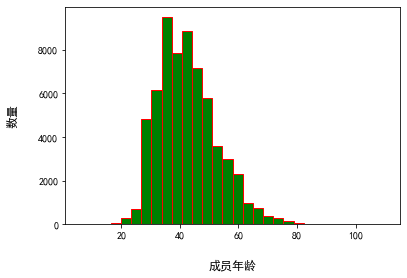

In [23]:
air_data=pd.read_csv('air_data.csv',encoding='utf-8')

plt.hist(air_data['AGE'],
        bins=30,
        color='g',
        edgecolor='red',
        )
plt.xlabel('成员年龄',labelpad=20,fontsize=12)
plt.ylabel('数量',labelpad=20,fontsize=12)
plt.show()

### 散点图

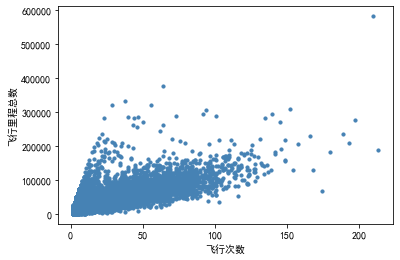

In [25]:
plt.scatter(air_data['FLIGHT_COUNT'],air_data['SEG_KM_SUM'],
           color='steelblue',
           marker='o',
           s=10,
           )
plt.xlabel('飞行次数')
plt.ylabel('飞行里程总数')
plt.show()

### 箱线图

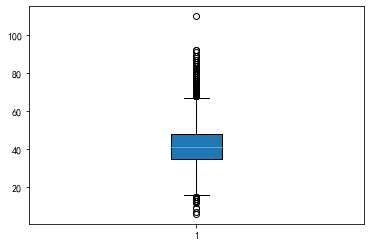

In [28]:
age=air_data[air_data['AGE'].notnull()]['AGE']
plt.boxplot(x=age,patch_artist=True)
plt.show()
#箱线图：
# 上边缘 、 下边缘
# 上四位分数、下四位分数
# 中位数
# 异常值

### 饼状图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

data = pd.read_excel('sales_details.xlsx')
data.head()

,创建日期,物料编号,应发库,销售订单数量,交货数量
0,2013.05.30,10482258-00,sz,60.0,60.0
1,2013.05.30,10261297-00,sz,3.0,3.0
2,2013.05.30,10134443-00,jn,50.0,50.0
3,2013.05.30,10195108-00,jn,20.0,20.0
4,2013.05.30,10261297-00,jn,1.0,1.0


In [8]:
data['创建日期']=pd.to_datetime(data['创建日期'],format='%Y.%m.%d',errors='coerce')
data_1=data.groupby(data['创建日期'].dt.year).size()
data_1

创建日期
2013.0     50489
2014.0    110831
2015.0    177040
2016.0     84853
dtype: int64

In [10]:
explode=[0,0,0.2,0]
colors=['red','blue','green','pink']

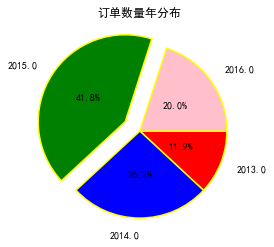

In [14]:
plt.rcParams['font.sans-serif']=['SimHei'] #图表中显示中文文字
plt.rcParams['axes.unicode_minus']=False #图表显示正负号
plt.pie(data_1.values,
        explode=explode,
        labels=data_1.index,
        colors=colors,
        autopct='%.1f%%',# 百分比
        pctdistance=0.5,#百分比标签与圆心距离
        labeldistance=1.2,#设置各扇形标签与圆心距离
        wedgeprops={'linewidth':1.5,
                   'edgecolor':'yellow'},#设置饼图内外边界的属性
        textprops={'fontsize':10,
                  'color':'black'},#设置饼图中文本属性
        counterclock=False,#是否逆时针呈现
       )
plt.title('订单数量年分布')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-seriferif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 数据准备
data = {'苹果':25,'梨':60,'香蕉':23,'西瓜':37}
df = pd.Series(data)
# 图表生成
plt.figure(figsize=(5,5),dpi=120)
explode = [0 for i in range(len(df.values))]
explode[1]=0.03
plt.pie(df.values,explode=explode,
        labels=df.index,colors=['#F08080','#F0E68C','#008B8B','#FFB6C1'],
        shadow=True,autopct='%.0f%%',
        pctdistance=1.25) 
plt.title("水果月销售量统计")
plt.show()

KeyError: 'font.sans-seriferif is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

array([45, 67, 23, 98], dtype=int64)

### 柱状图

In [16]:
data_2=data.groupby(data['创建日期'].dt.year).sum()['销售订单数量']

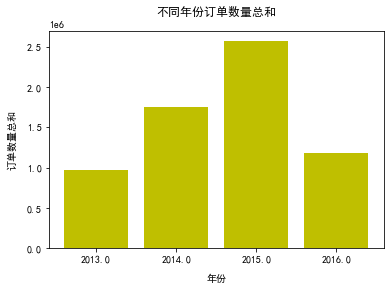

In [20]:
plt.bar(x=data_2.index,
       height=data_2.values,
       align='center',
       color='y',tick_label=data_2.index,
       )
plt.xlabel('年份',labelpad=10)
plt.ylabel('订单数量总和',labelpad=10)
plt.title('不同年份订单数量总和',pad=15)
plt.show()